In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import flatten_orbit as fo
import datetime as dt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def datetime_to_float(d):
    # total_seconds will be in decimals (millisecond precision)
    return d.timestamp()

def float_to_datetime(fl):
    return dt.datetime.fromtimestamp(fl)

def datetime_to_timestamp_array(times):
    timestamps = np.array([time.timestamp() for time in times])
    return timestamps

def scale(X,upper = 1, lower = -1):
    ## TODO: vectorize, taking too long
    n = len(X)
    X_std = (np.array([((X[i] - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))) for i in range(0,n)]))*(upper-lower)
    X_std = X_std + lower
    return X_std

def epi_x(t, params):
    """
    params is an array with the five different epicycloid parameters
    """
    (a,b,c,d,R) = params
    return (a+b)*np.cos(c*t-d) - R*np.cos((a+b)/b*(c*t-d))

In [3]:
parse_dates = ['Time']
jupiter = pd.read_csv("Jupiter2x.csv", parse_dates=parse_dates, date_parser = pd.to_datetime)
datetimes = jupiter['Time']
timestamps = datetime_to_timestamp_array(datetimes)
jupiter_true = jupiter[['X','Y','Z']].to_numpy()
normal = fo.generate_plane_vector(jupiter_true)
jupiter_flat = fo.align_with_z_axis(jupiter_true, normal)

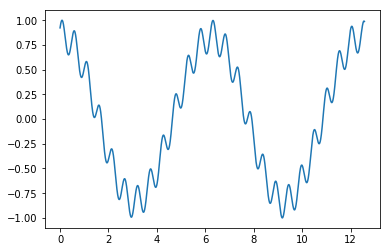

In [4]:
x_true = jupiter_flat[:,0]
x_scl = scale(x_true, upper = 1.0, lower=-1.0)
timestamps_scl = scale(timestamps, upper = 4*np.pi, lower = 0)
#plt.plot(timestamps, epi_x(timestamps, [0.7,0.1,2e-8,0,0.2]))
plt.plot(timestamps_scl, x_scl)
#plt.plot(timestamps, np.sin(1.75e-8*timestamps))
plt.show()

In [5]:
print(timestamps_scl)

[0.00000000e+00 1.19691119e-03 2.39382239e-03 ... 1.25639768e+01
 1.25651737e+01 1.25663706e+01]


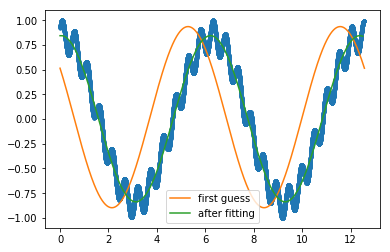

In [6]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = len(x_scl) # number of data points
t = timestamps_scl
f = 1.15247 # Optional!! Advised not to use
data = x_scl # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 1
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.cos(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.cos(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
#data_fit = est_amp*np.cos(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.cos(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

[ 0.76656176  0.07091478  1.02335106  0.0785095  -0.16149045]


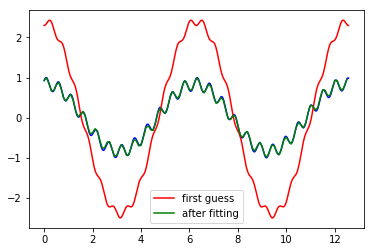

In [22]:
N = len(x_scl) # number of data points
t = timestamps_scl
f = 1.15247 # Optional!! Advised not to use
data = x_scl # create artificial data with noise

guess_a = 2.2
guess_b = 0.2
guess_c = 1
guess_d = 0
guess_R = 0.1

params = [guess_a, guess_b, guess_c, guess_d, guess_R]

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = epi_x(t, params)

optimize_func = lambda x: epi_x(t, x) - data
params = leastsq(optimize_func, params)[0]
print(params)
# recreate the fitted curve using the optimized parameters
#data_fit = epi_x(t, params)

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=epi_x(fine_t, params)

plt.plot(t, data, 'b')
plt.plot(t, data_first_guess, 'r', label='first guess')
plt.plot(fine_t, data_fit, 'g', label='after fitting')
plt.legend()
plt.show()